In [123]:
include("../src/HPFEM.jl")

HPFEM

In [124]:
nel = 2
nnodes = nel + 1
idir = Int[]#[1,nnodes]
M = 3
Q = M+2
bas = HPFEM.Basis1d(M,Q)
lmap = HPFEM.locmap(bas)
dof = HPFEM.DofMap1d(lmap, nnodes, idir);


2


In [125]:
lmap.ni

1

In [126]:
a = 0.0
b = π
nodes = collect(linspace(a, b, nnodes))

3-element Array{Float64,1}:
 0.0    
 1.5708 
 3.14159

In [127]:
elems = [HPFEM.Element1d(e, nodes[e], nodes[e+1], bas) for e = 1:nel];

In [128]:
solver = HPFEM.CholeskySC(dof, HPFEM.BBMatrix);

In [129]:
for e = 1:nel
    Ae = HPFEM.mass_matrix(bas, elems[e])
    HPFEM.add_local_matrix(solver, e, Ae)
end


In [130]:
Fe = zeros(HPFEM.nmodes(lmap), nel)

for e = 1:nel
    fe = cos(elems[e].x)
    HPFEM.add_rhs!(bas, elems[e], fe, sub(Fe, :, e))
end

# Apply Dirichilet BCs:
#Fe[1,1] = cos(a)
#Fe[2,nel] = cos(b)
#Fe


In [131]:
HPFEM.solve!(solver, Fe)

3x2 Array{Float64,2}:
 1.02747       7.48366e-17
 7.48366e-17  -1.02747    
 0.753525     -0.753525   

In [132]:
ξ = collect(linspace(-1,1,101));
nq = length(ξ)
fun = zeros(nq, nel)
for e = 1:nel
    for k = 1:M
        for q = 1:nq
            fun[q,e] += Fe[k,e] * bas(ξ[q], k)
        end
    end
end



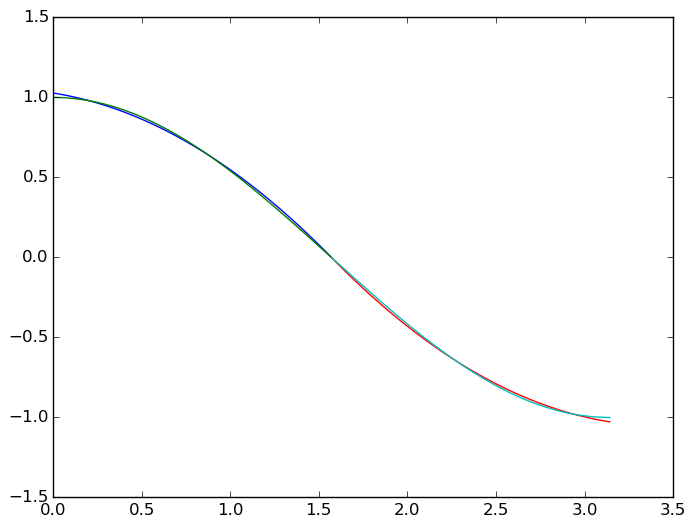

0.027472645259688067

In [133]:
using PyPlot
maxerr = 0.0
for e = 1:nel
    el = elems[e]
    x = (1-ξ)*el.a/2 + (1+ξ)*el.b/2
    err = maxabs(fun[:,e] - cos(x))
    
    if err > maxerr
        maxerr = err
    end
    plot(x, fun[:,e])
    plot(x, cos(x))
end
maxerr